In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('../dataset/commerce_sales_data.csv')

In [8]:
df.head()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 0 to 998
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Customer ID      901 non-null    object        
 1   Gender           901 non-null    object        
 2   Region           901 non-null    object        
 3   Age              901 non-null    float64       
 4   Product Name     901 non-null    object        
 5   Category         901 non-null    object        
 6   Unit Price       901 non-null    float64       
 7   Quantity         901 non-null    int64         
 8   Total Price      901 non-null    int64         
 9   Shipping Fee     901 non-null    float64       
 10  Shipping Status  901 non-null    object        
 11  Order Date       901 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 91.5+ KB


In [10]:
df.describe()

,Age,Unit Price,Quantity,Total Price,Shipping Fee
count,900.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,46.695556,457.703777,3.008000,1346.600000,12.416390
std,15.011400,537.231434,1.404246,1834.037877,4.412185
min,18.000000,30.000000,1.000000,30.000000,5.000000
25%,35.000000,50.000000,2.000000,200.000000,8.560000
50%,49.000000,200.000000,3.000000,600.000000,12.315000
75%,59.000000,800.000000,4.000000,1500.000000,16.075000
max,69.000000,3109.560612,5.000000,7500.000000,19.980000


In [20]:
df.isnull().sum()

Customer ID        0
Gender             0
Region             0
Age                0
Product Name       0
Category           0
Unit Price         0
Quantity           0
Total Price        0
Shipping Fee       0
Shipping Status    0
Order Date         0
dtype: int64

In [14]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\Mom\AppData\Local\Temp\ipykernel_16148\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(901, 12)

In [21]:
df.head()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,46.695556,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.000000,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.000000,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.000000,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,46.695556,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


In [47]:
df.tail()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
994,CUST0079,Male,West,26.000000,Smartwatch,Wearables,200.0,2,400,7.14,Returned,2023-01-04
995,CUST0201,Female,South,49.000000,Headphones,Accessories,100.0,1,100,17.21,In Transit,2023-01-05
996,CUST0133,Male,East,47.000000,Laptop,Electronics,1500.0,1,1500,19.19,Delivered,2023-04-01
997,CUST0055,Female,North,46.695556,Mouse,Accessories,30.0,5,150,19.35,Delivered,2023-10-20
998,CUST0023,Female,South,29.000000,Laptop,Electronics,1500.0,5,7500,10.36,Returned,2023-01-07


In [45]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

#### Univariate Analysis

In [31]:
region = df.Region.value_counts()
category = df.Category.value_counts()
gender = df['Gender'].value_counts()

print(region)
print(category)
print(gender)


Region
West     238
South    233
East     217
North    213
Name: count, dtype: int64
Category
Electronics    429
Accessories    362
Wearables      110
Name: count, dtype: int64
Gender
Male      473
Female    428
Name: count, dtype: int64


<Axes: title={'center': 'Sales Distribution By Region'}, xlabel='Region', ylabel='Frequency'>

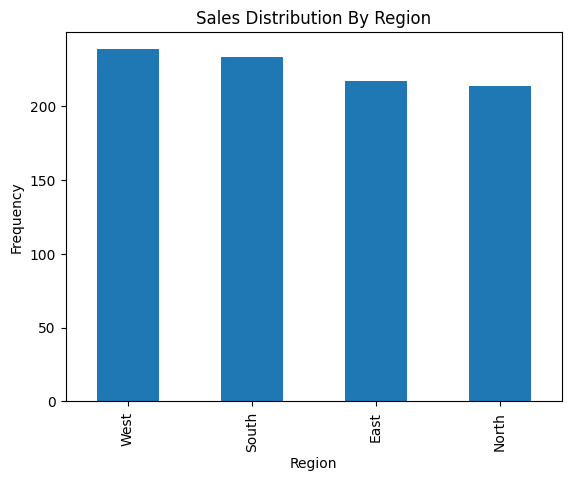

In [34]:
region.plot(kind='bar', xlabel='Region', ylabel='Frequency', title='Sales Distribution By Region' )

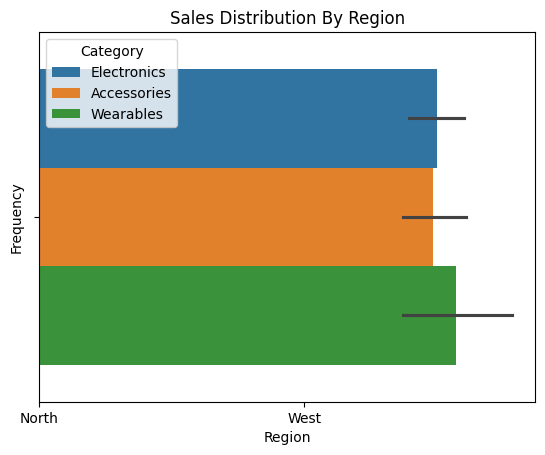

In [40]:
sns.barplot(x='Region', hue='Category', data = df)
# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Sales Distribution By Region')
plt.show()

<Axes: title={'center': 'Sales Distribution By Category'}, xlabel='Iteem Category', ylabel='Frequency'>

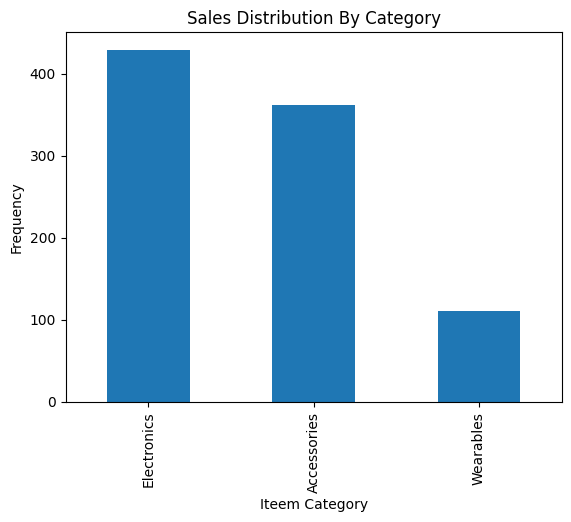

In [29]:
category.plot(kind='bar', xlabel='Iteem Category', ylabel='Frequency', title='Sales Distribution By Category' )

<Axes: title={'center': 'Sales Distribution By Gender'}, xlabel='Gender', ylabel='Frequency'>

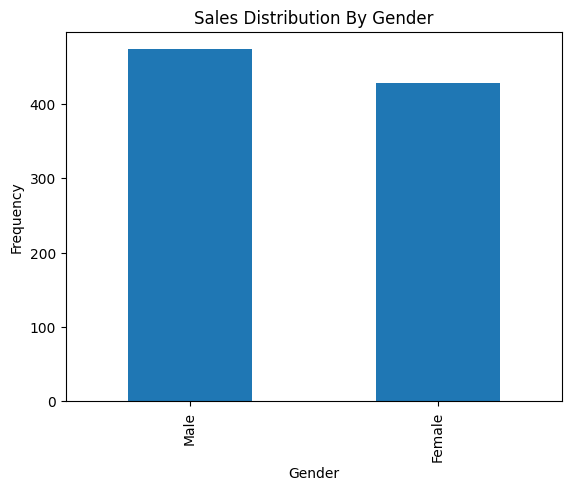

In [32]:
gender.plot(kind='bar', xlabel='Gender', ylabel='Frequency', title='Sales Distribution By Gender' )